# Techniques of handling missing values

##### 1) Mean / Median / Mode Imputation
##### 2) Random Sample Imputation
##### 3) Capturing Nan values with a New feature
##### 4) End of Distribution Imputation
##### 5) Arbitary Imputation
##### 6) Frequent Categories Imputation

# 4) End of Distribution Imputation
##### If there is suspicion that the missing value is not at random then capturing that information is important. 
In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [1]:
import pandas as pd
#Read Titanic Training Data Set
df = pd.read_csv('C:/Users/Kapil Wanaskar/Data Sets/titanic_train (1).csv')
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [2]:
#focusing on only 3 columns
df = pd.read_csv('C:/Users/Kapil Wanaskar/Data Sets/titanic_train (1).csv', usecols=['age','fare','survived'])
df.head() # reading only top 5 rows

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

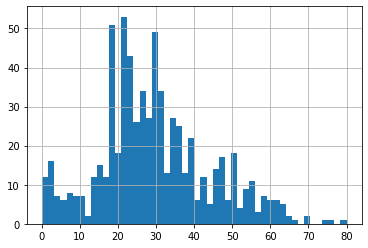

In [3]:
# plotting Histogram
df.age.hist(bins=50)

In [4]:
df.age.mean() #found mean= central value

29.519847189349115

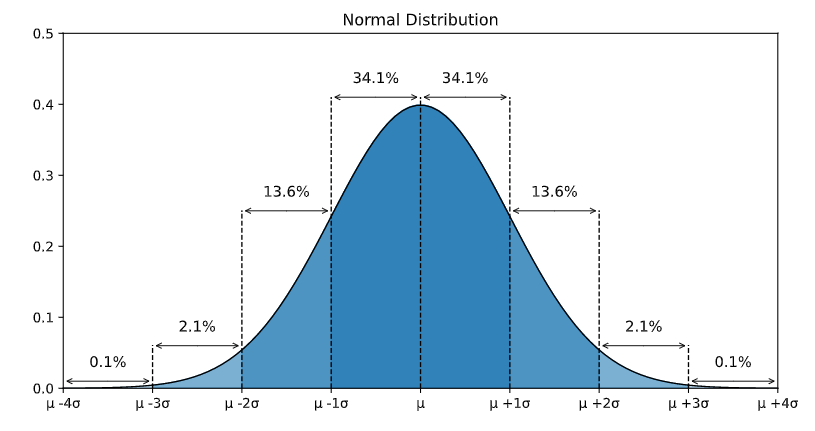

In [5]:
#trying to pickup data after 3 std. deviation (mean + 3 sigma)
extreme = df.age.mean()+ 3*df.age.std()
extreme

73.20657749172571

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

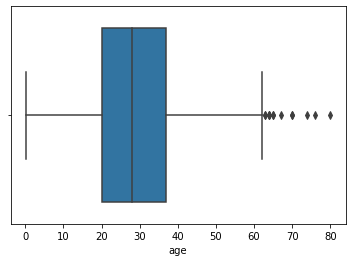

In [6]:
#to check Outliers by plotting BoxPlot
import seaborn as sns
sns.boxplot('age', data=df)

In [7]:
# the dots after right vertical line
# are called as Outliers
# here, we dont have Outliers on Left Side

In [8]:
# if you have doubts or need further clarification about statistics concepts
# 1) Normal distribution
# 2) Outliers
# 3) Box plot
# You may contact me

In [9]:
#create a function which will impute NAN values
def impute_nan(df,variable,median,extreme):
# df,variable,median ~ are parameters
    df[variable+"_end_distribution"] = df[variable].fillna(extreme) # filling NAN values with 'extreme' in'age_end_distribution' column
    df[variable].fillna(median,inplace=True)  # replacing NAN values with 'median' in the 'age' column

In [10]:
median = df.age.median()    
median # extracting Median of the database

28.0

In [11]:
impute_nan(df,'age',median,extreme)
df

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000
...,...,...,...,...
845,55.0,50.0000,0,55.000000
846,58.0,29.7000,0,58.000000
847,24.0,26.0000,1,24.000000
848,3.0,13.7750,0,3.000000


<AxesSubplot:>

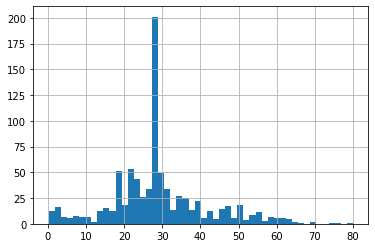

In [12]:
#plot histogram for 'age' column
df['age'].hist(bins=50)

<AxesSubplot:>

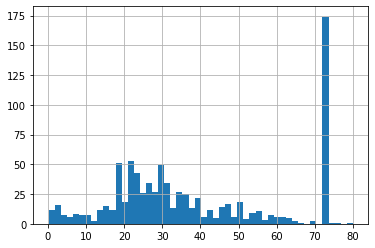

In [13]:
#plot histogram for 'age_end_distribution' column
df['age_end_distribution'].hist(bins=50)

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_end_distribution'>

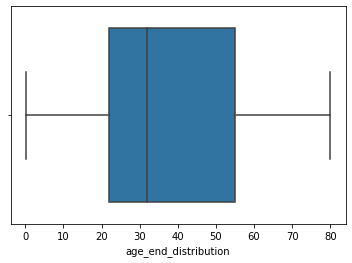

In [14]:
sns.boxplot('age_end_distribution', data=df)
#cant see any outliers in new boxplot
#but there were some outliers in "age"s histogram on right hand side

# Advantages
1) Easy to implement
2) Captures the importane of missingness if there is one

# Dis-Advantage
1) Distorts the orginal distribution of the variable
2) If missingness is not important, it may mask the predictive power of the orginal variable by distorting its ditribution
3) If the number of NaN values is big, it will mask true outliers in the distribution
4) If the number of NaN values is small, the replaced NaN may be considered an outlier and pre-processed in a subsequent step of feature engineering